# Prediction using Unsupervised ML
Task: Predict the optimun number of clusters and present it visually


In [85]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [76]:
#load dataset

ds = pd.read_csv("iris.csv")
ds.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
#Explore the data

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [78]:
ds.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [79]:
ds.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [80]:
ds.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

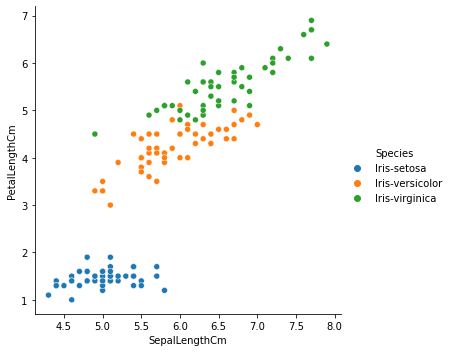

In [81]:
#Visualize the data

sns.relplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=ds)

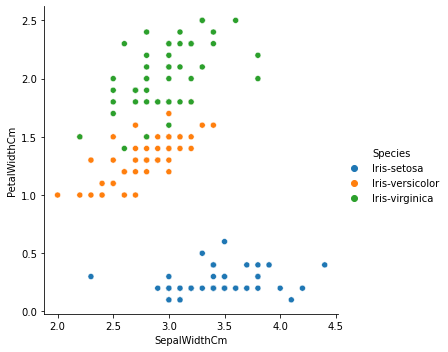

In [82]:
sns.relplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', data=ds)

In [83]:
data = ds
new_ds = data.drop(columns = ["Species", "Id"])
new_ds.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Find the optimum number of clusters using K-Means: The Elbow Method

C:\Users\Jaydee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Sum of Squared Distances')

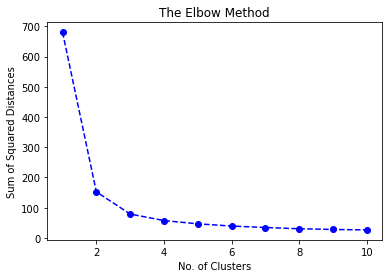

In [84]:
sum_of_squared_distances = []
K = range(1, 11)
for num_clusters in K:
    kmeans = KMeans(num_clusters)
    kmeans.fit(new_ds)
    sum_of_squared_distances.append(kmeans.inertia_)

#visualize the result
plt.plot(K, sum_of_squared_distances, 'bo--')
plt.title("The Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Sum of Squared Distances")

In the above plot, the curve looks like an elbow is where the optimum clusters occurs. The elbow or K = 3 (i.e. Sum of squared distances falls suddenly) indicating the optimal k for this dataset is 3.

#### Build the model

In [86]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(new_ds)
print(model.inertia_)

78.94084142614601


#### Visualize the Clusters

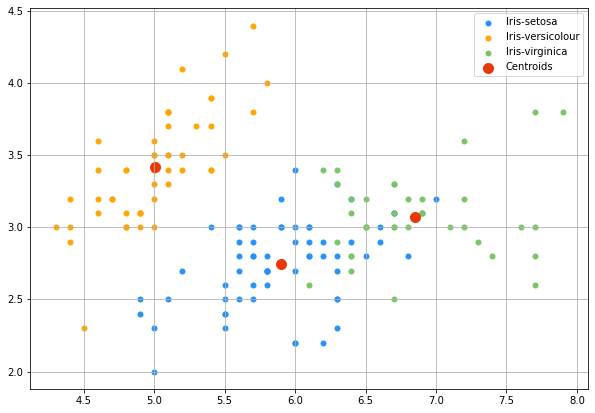

In [92]:
plt.figure(figsize=(10,7))
X = new_ds.iloc[:, [0, 1, 2, 3]].values
plt.scatter(X[predictions == 0, 0], X[predictions == 0, 1], s = 25, c = '#2592f5', label = 'Iris-setosa')
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], s = 25, c = '#ffa500', label = 'Iris-versicolour')
plt.scatter(X[predictions == 2, 0], X[predictions == 2, 1], s = 25, c = '#7ac568', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = '#e93806', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()